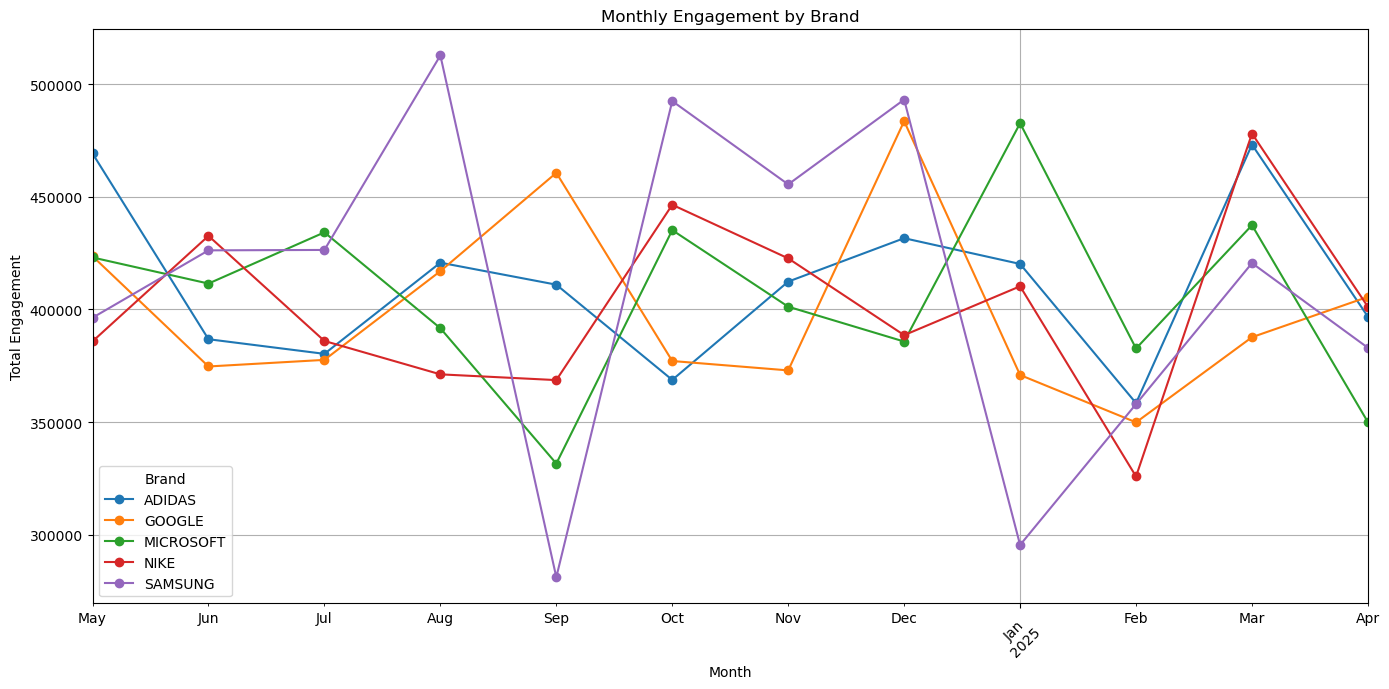

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/Users/zobiarasheed/Desktop/BI final/etl_pipeline_files/cleaned_social_media_data.csv")

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['month'] = df['timestamp'].dt.to_period('M')

# Filter brands with enough data (optional, prevents clutter)
top_brands = df['brand_name'].value_counts().head(5).index
df = df[df['brand_name'].isin(top_brands)]

# Group by brand and month
brand_monthly = df.groupby(['brand_name', 'month'])[['likes_count', 'shares_count', 'comments_count']].sum()

# Create total engagement column
brand_monthly['total_engagement'] = brand_monthly.sum(axis=1)

# Reset index for plotting
brand_monthly = brand_monthly.reset_index()

# Pivot for line plot
pivot_df = brand_monthly.pivot(index='month', columns='brand_name', values='total_engagement')

# Plot
pivot_df.plot(figsize=(14, 7), marker='o')
plt.title("Monthly Engagement by Brand")
plt.xlabel("Month")
plt.ylabel("Total Engagement")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Brand")
plt.show()


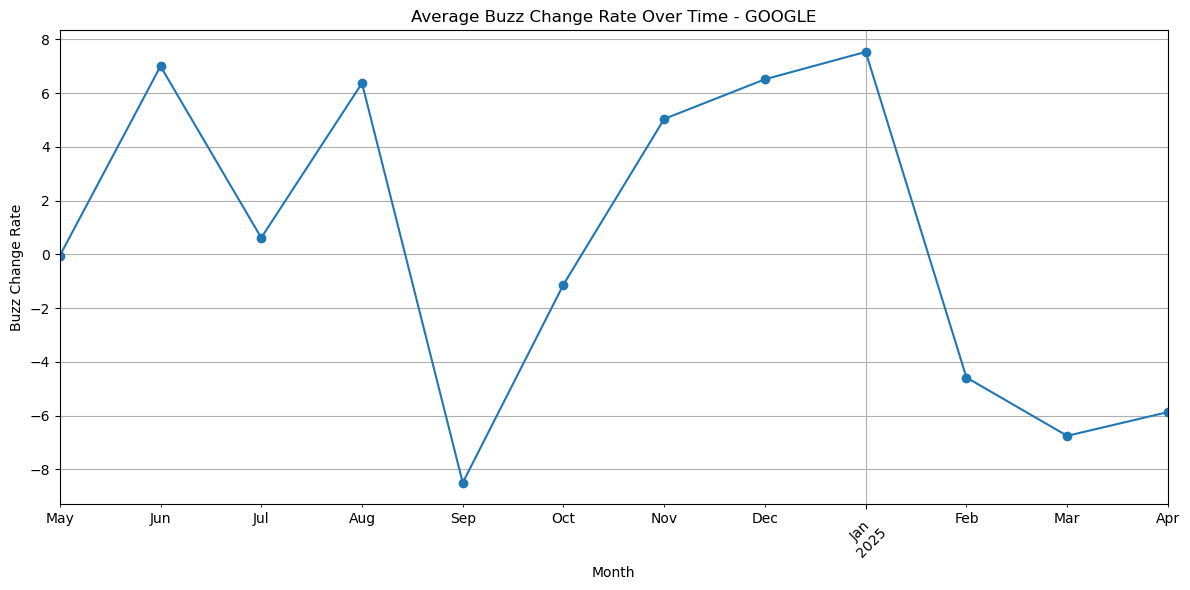

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/Users/zobiarasheed/Desktop/BI final/etl_pipeline_files/cleaned_social_media_data.csv", parse_dates=["timestamp"])

# Set the brand name to filter
brand_name = "GOOGLE"  # ← change this to a valid brand in your data

# Filter for the brand
brand_df = df[df['brand_name'] == brand_name]

# Check if data exists
if brand_df.empty:
    print(f"No data found for brand: {brand_name}")
else:
    # Group by month and calculate average buzz_change_rate
    buzz_trend = brand_df.groupby(brand_df['timestamp'].dt.to_period('M'))['buzz_change_rate'].mean()

    # Plot
    buzz_trend.plot(figsize=(12, 6), marker='o')
    plt.title(f"Average Buzz Change Rate Over Time - {brand_name}")
    plt.xlabel("Month")
    plt.ylabel("Buzz Change Rate")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
#Buzz Change Rate typically refers to how much public attention or discussion about a topic, brand, or campaign has increased or decreased over time.

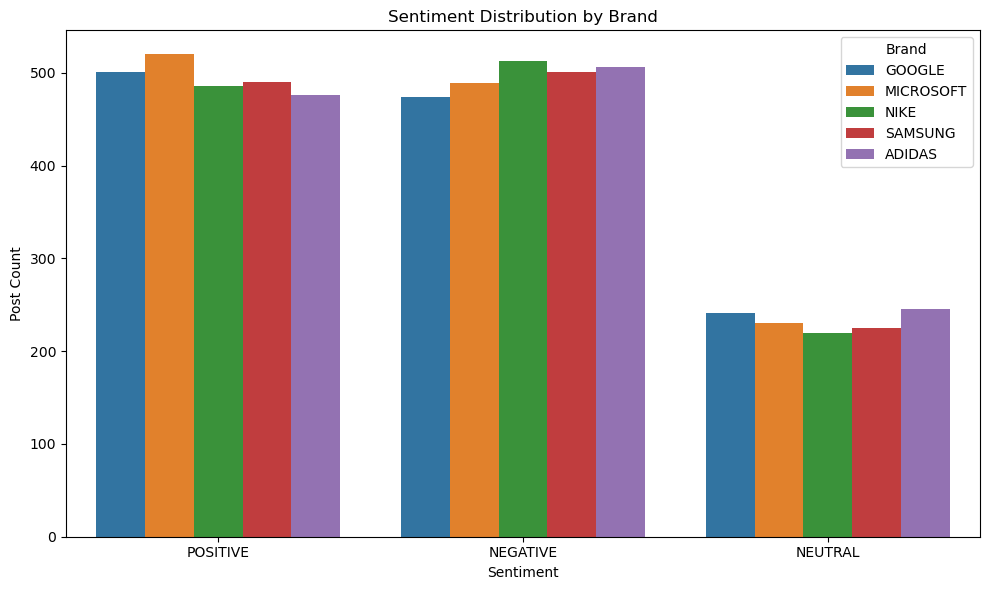

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter to top 5 brands to keep plot readable
top_brands = df['brand_name'].value_counts().head(5).index
filtered_df = df[df['brand_name'].isin(top_brands)]

# Plot sentiment distribution by brand
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='sentiment_label', hue='brand_name')
plt.title("Sentiment Distribution by Brand")
plt.xlabel("Sentiment")
plt.ylabel("Post Count")
plt.legend(title='Brand')
plt.tight_layout()
plt.show()
